In [64]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Dense, Layer, Input

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [33]:
# load the fashion- MNIST data

(X_train, y_train),(X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

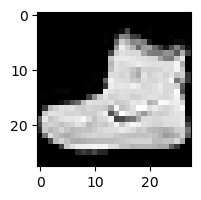

In [35]:
plt.figure(figsize= (2,2))
plt.imshow(X_train[0], cmap='gray')

## Data Prepocessing

In [36]:
## Normalize the data

X_train, X_test= X_train/255, X_test/255

In [37]:
# X_train[0]

In [38]:
# Now as our data is in 3D format, we need to rescale it from 3D images to 2D images. So, that we can use it for ML models

In [39]:
# rescaling data from 3D to 2D

X_train_reshape= X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test_reshape= X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

In [40]:
X_train_reshape.shape, X_test_reshape.shape

((60000, 784), (10000, 784))

In [55]:
# Create a empty list to store all the results from all the models
result = {}

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

k_fold= KFold(n_splits= 10, shuffle= True, random_state= 7)
model =LogisticRegression()
model.fit(X_train_reshape, y_train)
# cv_result= cross_val_score(model, X_train_reshape, y_train, cv= k_fold, scoring= 'accuracy')

In [ ]:
pred_y= model.predict(X_test_reshape)

In [ ]:
# Evaluate the model

acc_log= accuracy_score(y_test, pred_y)

# append in result
result['Logistic_Regression']= np.round(acc_log*100, 2)
acc_log

## Random Forest Classifier:

Random Forest Classifier is used for classification tasks, where the target variable is categorical or consists of discrete class labels.

It builds a forest of decision trees, each trained on a random subset of the training data and features.

During prediction, the class label with the most votes (mode) from all the trees in the forest is assigned as the predicted class for the input sample.

Random Forest Classifier is effective for tasks such as image recognition, spam detection, and sentiment analysis.

In [42]:
from sklearn.ensemble import RandomForestClassifier

# define the model
model_rf= RandomForestClassifier()

# fit the model
model_rf_fit= model_rf.fit(X_train_reshape, y_train)


In [44]:
# predict the model
pred_rf= model_rf_fit.predict(X_test_reshape)

In [58]:
# Evaluate the model

acc_rf= accuracy_score(y_test, pred_rf)

# append in result
result['RandaomForest']= np.round(acc_rf*100, 2)
acc_rf

0.8769

In [54]:
# plot classification report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.79      0.78      1000
           3       0.88      0.91      0.89      1000
           4       0.76      0.83      0.80      1000
           5       0.97      0.96      0.97      1000
           6       0.72      0.58      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



<Axes: >

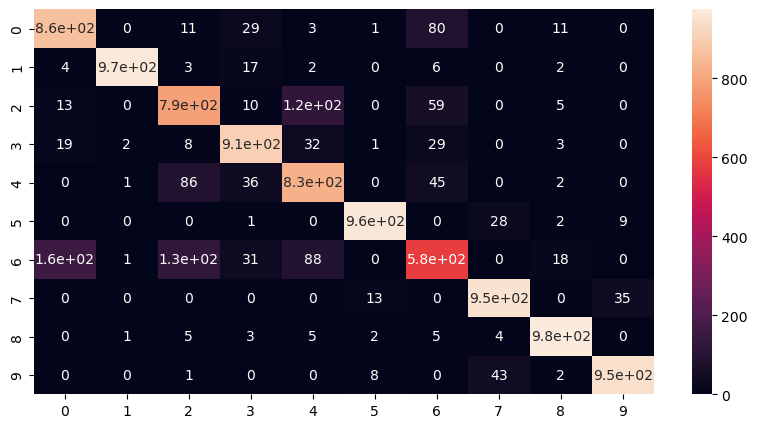

In [52]:
# plot confussion matrix
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred_rf), annot= True)

### KNN Implementation

K-Nearest Neighbors (KNN) is a simple yet powerful supervised machine learning algorithm used for both classification and regression tasks. It is a non-parametric and instance-based learning algorithm, meaning it makes predictions based on the similarity (or distance) between a new data point and existing labeled data points in the feature space.

In [80]:
from sklearn.preprocessing import StandardScaler
# Search the best K value for KNN
scaler = StandardScaler().fit(X_train_reshape)
rescaledX = scaler.transform(X_train_reshape)

# create n odd neighbors
n_knn= [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
param_grid= dict(n_neighbors= n_knn)

model_knn= KNeighborsClassifier()

k_fold= KFold(n_splits= 10, random_state= 7, shuffle= True)

grid= GridSearchCV(estimator= model_knn, param_grid= param_grid, scoring='accuracy', cv= k_fold)
grid_result= grid.fit(X= rescaledX, y= y_train)

In [69]:
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neig': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]},
             scoring='accuracy')

In [81]:
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')
means= grid_result.cv_results_['mean_test_score']
param= grid_result.cv_results_['params']
std= grid_result.cv_results_['std_test_score']

for mean, std, param in zip(means, std, param):
    print(f'{mean}, {std} with {param}')

Best: 0.8570833333333333 using {'n_neighbors': 5}
0.8505333333333333, 0.003839704849768181 with {'n_neighbors': 1}
0.8554333333333334, 0.004314188477827809 with {'n_neighbors': 3}
0.8570833333333333, 0.0035747960314774243 with {'n_neighbors': 5}
0.8567166666666666, 0.003835542841487873 with {'n_neighbors': 7}
0.8552166666666666, 0.003311637728442597 with {'n_neighbors': 9}
0.8532666666666667, 0.0036095552203684127 with {'n_neighbors': 11}
0.8511166666666666, 0.003908715333144057 with {'n_neighbors': 13}
0.8498833333333333, 0.004291496760390769 with {'n_neighbors': 15}
0.8476666666666667, 0.004763868642652161 with {'n_neighbors': 17}
0.8465833333333332, 0.004909882324908039 with {'n_neighbors': 19}
0.8458666666666665, 0.004558142896692313 with {'n_neighbors': 21}


In [86]:
# so we will go with k= 5

# define the model
model_knn= KNeighborsClassifier(n_neighbors=  5)

# fit the model
model_knn_fit= model_knn.fit(X_train_reshape, y_train)

#predict the test data
pred_knn= model_knn_fit.predict(X_test_reshape)

In [89]:
# evaluate accuracy

acc= accuracy_score(y_test, pred_knn)
result['Knn']= np.round(acc*100, 2)
acc

0.8554

In [88]:
# classification report
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



## SVM

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for both classification and regression tasks. They are particularly effective for binary classification problems but can also be extended to handle multi-class classification and regression tasks.

In [ ]:
# lets search the optimal value for C and kernal type using Randomized Search CV

c_values= [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 1.9, 2.1]
kernal_values= ['linear', 'poly', 'rbf', 'sigmoid']
param_grid= dict(C= c_values, kernel= kernal_values)
model= SVC()
k_fold= KFold(n_splits= 10, shuffle= True, random_state= 7)
grid= RandomizedSearchCV(estimator= model, param_distributions= param_grid, scoring= 'accuracy', cv= k_fold)
grid_result= grid.fit(X_train_reshape, y_train)

In [91]:
grid

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
                   estimator=SVC(),
                   param_distributions={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3,
                                              1.5, 1.7, 1.9, 2.1],
                                        'kernal': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='accuracy')

In [ ]:
print(f'Best {grid_result}')

## ANN

Artificial neural networks are a model inspired by the functioning of the human brain. It is made up of a set of nodes known as artificial neurons that are connected and transmit signals to each other. These signals are transmitted from the input to generate an output.

#### How do neural networks work?

The functioning of the networks is similar to that of the human brain. Networks receive a series of input values ​​and each of these inputs reaches a node called a neuron. The neurons of the network are in turn grouped into layers that form the neural network. Each of the neurons in the network in turn has a weight, a numerical value, with which it modifies the input received.

In [ ]:
labels= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
model_ann= keras.Sequential([
    
    # The input shape for the first layer of an ANN is a one-dimensional vector, where each element corresponds to a feature.
    keras.layers.Dense(units=10, input_shape= (X_train_reshape.shape[1],), activation='relu'),
    keras.layers.Dense(512, activation= 'relu'),
    keras.layers.Dense(64, activation= 'relu'),
    keras.layers.Dense(8, activation= 'relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_ann.compile(optimizer= 'Adam',
                 loss= 'sparse_categorical_crossentropy', 
                 metrics=['accuracy'])

In [ ]:
model_ann.fit(X_train_reshape, y_train, epochs= 5)

In [ ]:
model_ann.evaluate(X_test_reshape,y_test)

In [ ]:
pred_ann= model_ann.predict(X_test_reshape)

In [ ]:
pred_y=  [np.argmax(i) for i in pred_ann]

In [ ]:
accuracy_score(y_test, pred_y)        # accuracy= 0.8512

In [ ]:
labels[pred_y[1]], labels[y_test[1]]

## CNN


CNNs are a specialized type of neural network designed for processing grid-like data, such as images.

They consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers.

Convolutional layers apply convolution operations to input data using learnable filters (kernels) to extract local features.

Pooling layers downsample feature maps to reduce dimensionality and extract dominant features.

CNNs are particularly effective for tasks involving spatially structured data, such as image recognition, object detection, and image segmentation.

They leverage the hierarchical structure of images, where lower layers capture low-level features (e.g., edges, textures) and higher layers capture more abstract features (e.g., shapes, objects).

In [ ]:
#The input shape for a CNN is typically a three-dimensional tensor representing the image dimensions: width, height, and 
# number of channels (e.g., RGB channels for color images).
    
    
inp=Input(shape= (X_train.shape[1], X_train.shape[2],1))
layer= Conv2D(64, (3,3), activation= 'relu')(inp)
layer= MaxPool2D((2,2))(layer)
layer= Conv2D(32, (3,3), activation= 'relu')(layer)
layer= MaxPool2D((2,2))(layer)
layer= keras.layers.Flatten()(layer)
# layer= Dense(1000, activation= 'relu')(layer)
# layer= Dense(200, activation='relu')(layer)
out_layer= Dense(10, activation= 'sigmoid')(layer)

model= Model(inp, out_layer)

model.compile(optimizer= 'Adam',
            loss= 'sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs= 10)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
pred_y= model.predict(X_test)

In [ ]:
pred_y= [np.argmax(i) for i in pred_y]

In [ ]:
accuracy_score(y_test, pred_y)   # accuracy score predicted is 0.9054

In [ ]:
pred_y[:10]

In [ ]:
y_test[:10]

In [ ]:
labels[pred_y[2]]

In [ ]:
labels[y_test[2]]

In [ ]:
from tensorflow.keras.applications import VGG16
tf.config.run_functions_eagerly(True)
num_classes= 10
INPUT_SHAPE= (224, 224)
batch_size= 32  #change for better accuracy based on your dataset
epochs = 5 #change for better accuracy based on your dataset


In [ ]:
# load and compile VGG16
vgg= VGG16(input_shape= (INPUT_SHAPE+(3,)), include_top= False)

for layer in vgg.layers:
    layer.trainable= False

x= keras.layers.Flatten()(vgg.output)
x= Dense(128, activation= 'relu')(x)
x= Dense(64, activation= 'relu')(x)
x= Dense(num_classes, activation= 'softmax')(x)

model= Model(inputs= vgg.input, outputs= x)
model.compile(optimizer= 'Adam',
                 loss= 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
x_sample= X_train[:2000]

In [ ]:
y_reshape= y_train[:2000]

In [ ]:
x_reshape= []
for i in x_sample:
    img= cv2.cvtColor(i, cv2.COLOR_GRAY2RGB)
    x= cv2.resize(img, (224,224))
    x_reshape.append(x)

In [ ]:
x_reshape= np.array(x_reshape)

In [ ]:
x_reshape.shape

In [ ]:
model.fit(x_reshape, y= y_reshape, epochs= 5)

#### Save the Model

In [ ]:
keras_file= "Model.h5"
tf.keras.models.save_model(model,keras_file)



#### Prediction using new image


In [ ]:
#create new file test.py and run this filefrom tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

#load saved model
model = load_model('Model.h5') 

img_path = 'fresh.jpg'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)

# create a list containing the class labels
class_labels = [‘Apple’,’Banana’,’Orange’]

# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)

# print the label of the class with maximum score
print(class_labels[pred[0]])